# Chapter 2: Your First Learning Program

## Pizza and Correlation

In [1]:
import numpy as np # type: ignore
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

In [2]:
print(X[0:5], Y[0:5])

[13.  2. 14. 23. 13.] [33. 16. 32. 51. 27.]


In [3]:
Y

array([33., 16., 32., 51., 27., 16., 34., 17., 29., 15., 15., 32., 22.,
       37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27., 37.,
       17., 18., 25., 23.])

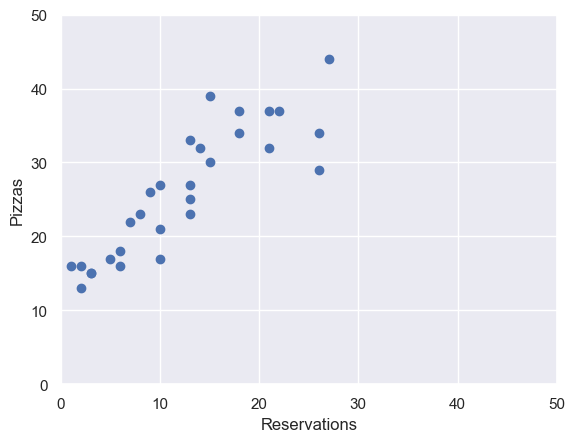

In [4]:
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
sns.set_theme()

plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.show()

## Tracing a Line

In [5]:
def predict(X, w):
    return X * w

In [6]:
def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)

In [7]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr) < current_loss:
            w += lr
        elif loss(X, Y, w - lr) < current_loss:
            w -= lr
        else:
            return w

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [8]:
w = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f" % w)
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

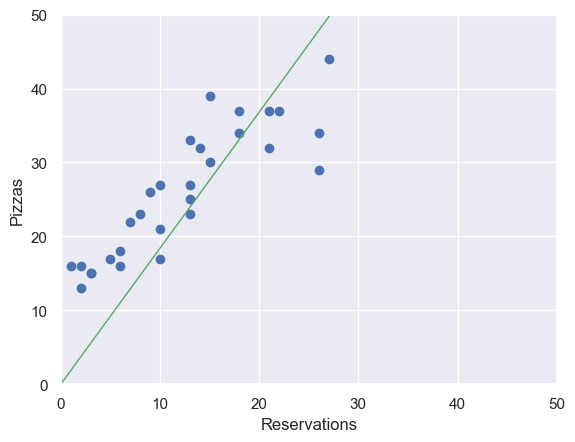

In [9]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [0, predict(x_edge, w)], linewidth=1.0, color="g")
plt.ion()
plt.show()

## Adding a Bias

In [10]:
def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)

In [11]:
w, b = train(X, Y, iterations=10000, lr=0.01)
print("\nw=%.3f, b=%.3f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

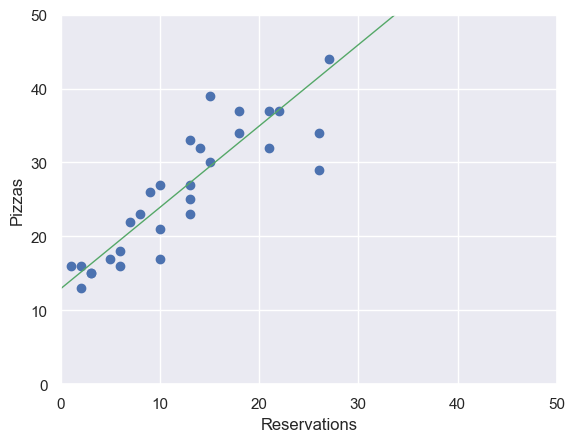

In [12]:
plt.plot(X, Y, "bo")
plt.xlabel("Reservations")
plt.ylabel("Pizzas")
x_edge, y_edge = 50, 50
plt.axis([0, x_edge, 0, y_edge])
plt.plot([0, x_edge], [b, predict(x_edge, w, b)], linewidth=1.0, color="g")
plt.ion()
plt.show()

In [13]:
print(loss(24, 20, 1, 0))

16.0


# Chapter 03: Walking the Gradient

## Gradient Descent

In [14]:
def gradient(X, Y, w):
    return 2 * np.average(X * (predict(X, w, 0) -Y))

In [15]:
def train(X, Y, iterations, lr):
    w = 0
    for i in range(iterations):
        print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, 0)))
        w -= gradient(X, Y, w) * lr
    return w

In [16]:
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w = train(X, Y, iterations=100, lr=0.001)
print("\nw=%.10f" % w)

Iteration    0 => Loss: 812.8666666667
Iteration    1 => Loss: 304.3630879787
Iteration    2 => Loss: 143.5265791020
Iteration    3 => Loss: 92.6549949641
Iteration    4 => Loss: 76.5646303400
Iteration    5 => Loss: 71.4753484132
Iteration    6 => Loss: 69.8656402969
Iteration    7 => Loss: 69.3564996643
Iteration    8 => Loss: 69.1954616593
Iteration    9 => Loss: 69.1445263431
Iteration   10 => Loss: 69.1284158205
Iteration   11 => Loss: 69.1233201627
Iteration   12 => Loss: 69.1217084379
Iteration   13 => Loss: 69.1211986595
Iteration   14 => Loss: 69.1210374197
Iteration   15 => Loss: 69.1209864206
Iteration   16 => Loss: 69.1209702899
Iteration   17 => Loss: 69.1209651878
Iteration   18 => Loss: 69.1209635741
Iteration   19 => Loss: 69.1209630637
Iteration   20 => Loss: 69.1209629022
Iteration   21 => Loss: 69.1209628512
Iteration   22 => Loss: 69.1209628350
Iteration   23 => Loss: 69.1209628299
Iteration   24 => Loss: 69.1209628283
Iteration   25 => Loss: 69.1209628278
Iteration

## Put Gradient Descent to the Test

In [17]:
import numpy as np

# Calling the predict() function
def predict(X, w, b):
    return X * w + b
# Calculatin the loss
def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)

# computing the derivative
def gradient(X, Y, w, b):
    w_gradient = 2 * np.average(X * (predict(X, w, b) - Y))
    b_gradient = 2 * np.average(predict(X, w, b) - Y)
    return (w_gradient, b_gradient)

# calling the training function for 20,000 iterations
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        if (i % 5000 == 0):
            print("Iteration %4d => Loss: %.10f" % (i, loss(X, Y, w, b)))
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return w, b

# loading the data and then calling the desired functions
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)
w, b = train(X, Y, iterations=20000, lr=0.001)
print("\nw=%.10f, b=%.10f" % (w, b))
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.8666666667
Iteration 5000 => Loss: 23.0660254210
Iteration 10000 => Loss: 22.8438317248
Iteration 15000 => Loss: 22.8427421050

w=1.0811301700, b=13.1722676564
Prediction: x=20 => y=34.79


## Visualize how the loss function deviate when the learning rate changes.

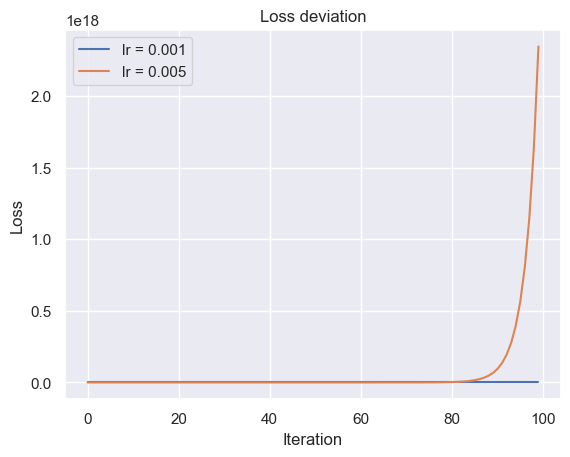

In [41]:
import matplotlib.pyplot as plt # type: ignore

# Modify the train function to return loss values
def train(X, Y, iterations, lr):
    w = b = 0
    losses = []
    for i in range(iterations):
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
        losses.append(loss(X, Y, w, b))
    return w, b, losses

# Train the model with lr = 0.001
w1, b1, losses1 = train(X, Y, iterations=100, lr=0.001)

# Train the model with lr = 0.005
w2, b2, losses2 = train(X, Y, iterations=100, lr=0.005)

# Plot the losses
plt.plot(losses1, label='lr = 0.001')
plt.plot(losses2, label='lr = 0.005')
plt.title('Loss deviation')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Chapter 04: Hyperspace

## Add more dimensions

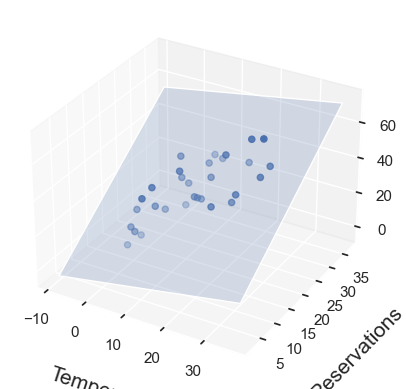

In [2]:
# Plot a plane that roughly approximates a dataset with two input variables.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d
import seaborn as sns

# Import the dataset
x1, x2, x3, y = np.loadtxt("pizza_3_vars.txt", skiprows=1, unpack=True)

# These weights came out of the training phase
w = np.array([-3.98230894, 0.37333539, 1.69202346])

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Temperature", labelpad=15, fontsize=15)
ax.set_ylabel("Reservations", labelpad=15, fontsize=15)
ax.set_zlabel("Pizzas", labelpad=5, fontsize=15)

# Plot the data points
ax.scatter3D(x1, x2, y, color='b')

# Plot the plane
MARGIN = 10
edges_x = [np.min(x1) - MARGIN, np.max(x1) + MARGIN]
edges_y = [np.min(x2) - MARGIN, np.max(x2) + MARGIN]
xs, ys = np.meshgrid(edges_x, edges_y)
zs = np.array([w[0] + x * w[1] + y * w[2] for x, y in
              zip(np.ravel(xs), np.ravel(ys))])
ax.plot_surface(xs, ys, zs.reshape((2, 2)), alpha=0.2)

plt.show()